# Credit Score Project

## Goal #1: Data Exploration and Feature Engineering

### 1.1 Data Exploration
Perform exploratory data analysis to gain insights into the dataset. Generate summary statistics, visualizations, and any relevant plots to understand the distribution of features. At this stage be sure to identify any inconsistencies, missing values, or outliers in the data.

In [1]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('UCI_Credit_Card_final.csv', index_col=0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,female,university,married,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,female,university,single,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,female,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,female,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,male,university,married,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [3]:
# Showig some summary statistics
df.describe()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,29850.000000,29850.000000,...,29850.000000,29850.000000,29850.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,29980.000000
mean,167484.322667,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51248.873702,49141.070486,...,43207.739631,40294.314104,38873.903685,3.333339e+09,3.333340e+09,3.333339e+09,3.333338e+09,3.333338e+09,3.333339e+09,0.221281
std,129747.661567,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73658.062732,71155.504967,...,64232.533139,60781.654516,59588.936522,1.825468e+11,1.825468e+11,1.825468e+11,1.825468e+11,1.825468e+11,1.825468e+11,0.415116
min,10000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,50000.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3570.250000,2986.000000,...,2330.500000,1764.250000,1250.250000,1.000000e+03,8.345000e+02,3.900000e+02,2.980000e+02,2.547500e+02,1.180000e+02,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22414.000000,21200.000000,...,19044.000000,18097.000000,17056.500000,2.100000e+03,2.009000e+03,1.800000e+03,1.500000e+03,1.500000e+03,1.500000e+03,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67190.000000,63873.500000,...,54425.750000,50168.000000,49202.750000,5.007250e+03,5.000000e+03,4.512000e+03,4.016000e+03,4.041250e+03,4.000000e+03,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,1.000000e+13,1.000000e+13,1.000000e+13,1.000000e+13,1.000000e+13,1.000000e+13,1.000000


In [4]:
# Exploring further the data
print(df.shape)
print(df.info())

(30000, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   29986 non-null  object 
 3   MARRIAGE                    29946 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_1                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   29850 non-null  float64
 12  BILL_AMT2                   29850 non-null  float64
 13  BILL_AMT3               

Text(0.5, 1.0, 'Correlation Matrix')

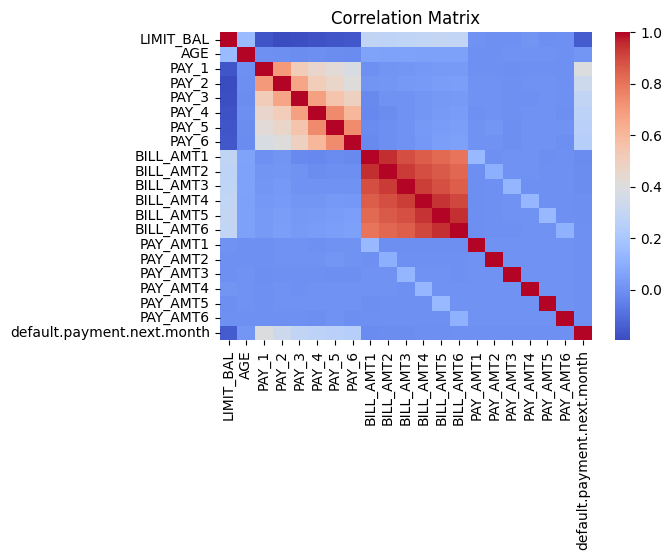

In [5]:
# Correlation Matrix
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm') 
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Distribution of Default Payments')

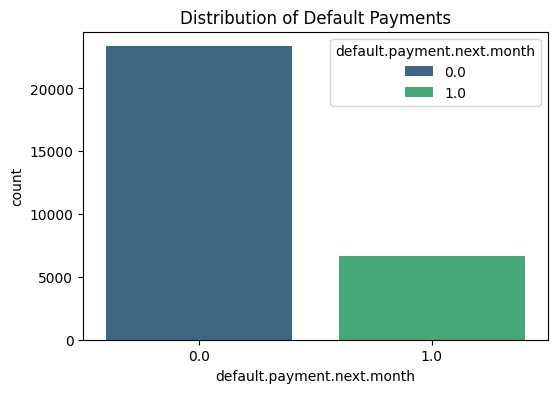

In [6]:
# Plotting target variable ("default.payment.next.month") distribution
plt.figure(figsize=(6,4))
sns.countplot(x='default.payment.next.month', data=df, palette='viridis', hue='default.payment.next.month')
plt.title('Distribution of Default Payments')

<Figure size 800x500 with 0 Axes>

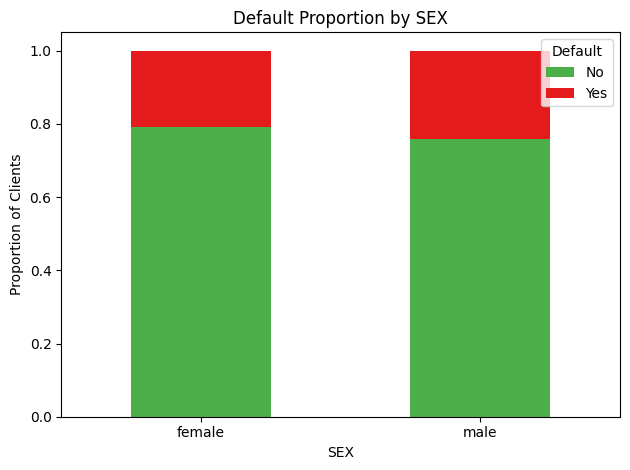

<Figure size 800x500 with 0 Axes>

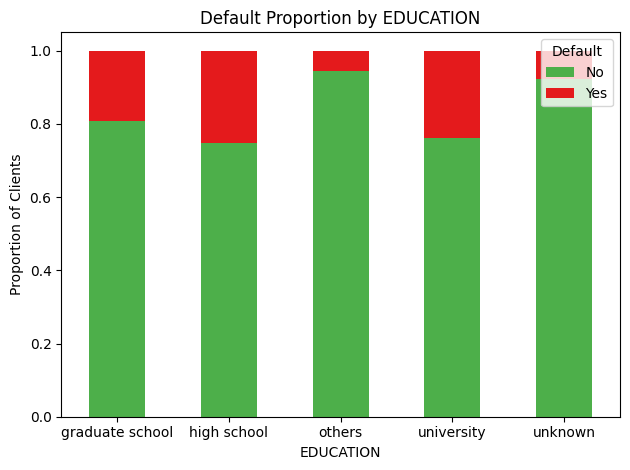

<Figure size 800x500 with 0 Axes>

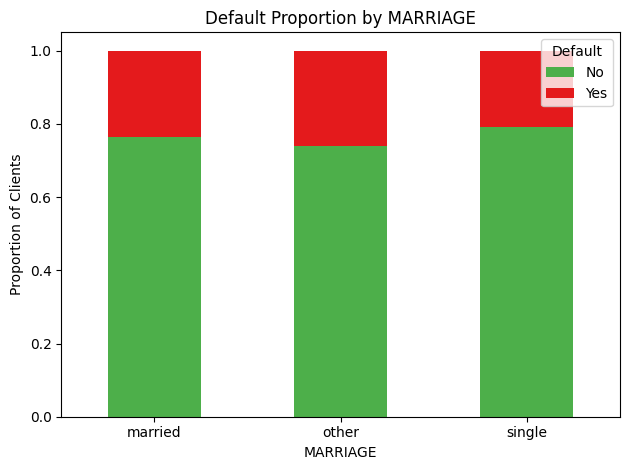

In [7]:
# Plotting the default proportion for each categorical variable
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    # Creiamo una tabella di contingenza normalizzata per riga (proporzioni)
    ct = pd.crosstab(df[col], df['default.payment.next.month'], normalize='index')
    ct.plot(kind='bar', stacked=True, color=['#4daf4a', '#e41a1c'])
    plt.title(f'Default Proportion by {col}')
    plt.ylabel('Proportion of Clients')
    plt.legend(title='Default', labels=['No', 'Yes'], loc='upper right')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

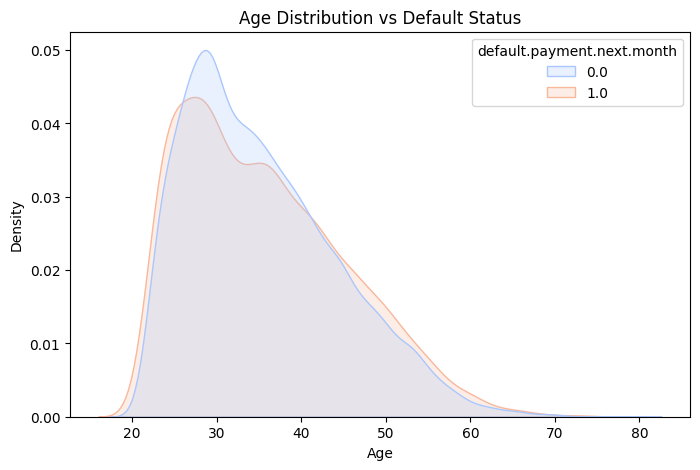

In [8]:
# Plotting Age Distribution vs Default Status
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='AGE', hue='default.payment.next.month', fill=True, common_norm=False, palette='coolwarm')
plt.title('Age Distribution vs Default Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### 1.2 Feature Engineering
Handle missing values and outliers appropriately, make sure to motivate your decisions. Transform categorical variables using techniques we saw during the lab sessions (e.g., one-hot encoding, ordinal encoding, etc.).

In [9]:
# Removing rows with missing values (losing roughly 0.5% to 0.7% of the data)
df = df.dropna()

# Checking if it worked
print(df.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


### 1.3 Feature Augmentation
Create new features that could potentially improve your modelling capabilities by intelligently combining the original features in the dataset. Be creative but remember to justify your choices.

> **User Notes**: *What new features did you create and why?*

In [10]:
# Code for feature augmentation


## Goal #2: Build your classification model!
First of all, split your dataset into training and testing sets.

In [11]:
from sklearn.model_selection import train_test_split

# Split dataset


### 2.1 Baseline and Training
Start by selecting a suitable baseline approach for your classification task. Then, choose three or more classification algorithms (e.g., logistic regression, decision tree, random forest, etc.) and train them on your data.

> **User Notes**: *Which baseline did you choose? Which models did you select and why?*

In [12]:
# Baseline and Model Training code


### 2.2 Model Evaluation
Evaluate the performance of each of your models using appropriate performance metrics and discuss the results as well as any insights gained from the evaluation.

> **User Notes**: *Discuss the evaluation metrics used and the results obtained.*

In [13]:
# Model evaluation code


### 2.3 Model Comparison
Compare the results between the models chosen in Step 2.1. Discuss the differences and, if possible, try to intuitively understand why one performed better than the other ones.

> **User Notes**: *Compare your models here.*

### 2.4 Fine-tuning
Experiment with hyperparameter tuning to optimize the model’s performances, test at least two hyperparameter search strategies (e.g., Grid Search, Genetic Search, etc.).

> **User Notes**: *Describe your tuning strategy and results.*

In [14]:
# Hyperparameter tuning code


### 2.5 Model Selection
Select the best-performing model based on your evaluations and justify your choice. Perform an in depth analysis of the selected model’s performance.

> **User Notes**: *Justify your final model selection.*

In [15]:
# Final model analysis


### 2.6 Dimensionality Reduction
Experiment with some of the dimensionality reduction techniques seen in class (e.g., PCA, K-PCA, etc.).

> **User Notes**: *Observations on dimensionality reduction.*

In [16]:
# Dimensionality reduction code
